In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv("iris_1D.csv")

In [3]:
data_frame

,Petal_Length,Label
0,1.4,0.0
1,1.0,0.0
2,1.5,0.0
3,3.0,1.0
4,3.8,1.0
5,4.1,1.0


In [4]:
X = data_frame.iloc[:,0].values

In [5]:
X = X.reshape(-1 , 1)

In [6]:
temp = np.ones((6 , 1))

In [7]:
X = np.concatenate((X, temp) , axis = 1 )

In [8]:
X.shape

(6, 2)

In [9]:
y = data_frame.iloc[:,-1].values

# Solving

In [10]:
n = 2 # individual size
m = 50 # population size
losses = []
n_generation = 60

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [12]:
def create_random_value(bound = 20):
    return (random.random() - 0.5)*bound

In [13]:
def predict(individual):
    theta = np.array(individual)
    z = np.dot(X, theta)
    return sigmoid(z)

In [14]:
def compute_loss(individual):
    y_hat = predict(individual)
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return -(y*np.log(y_hat) + (1 - y)*np.log(1- y_hat)).mean()

In [15]:
def compute_fitness(individual):
    return 1/(compute_loss(individual) + 1)

In [16]:
def create_individual():
    return [create_random_value() for _ in range(n)]

In [17]:
def crossover(individual1 , individual2 , cr = 0.9):
    individual_1 = individual1.copy()
    individual_2 = individual2.copy()
    
    for i in range(n):
        if (random.random() < cr):
            individual_1[i] , individual_2[i] = individual2[i], individual1[i]
    return individual_1,individual_2
    

In [18]:
def mutate(individual , mr = 0.05):
    
    individual_m = individual.copy()
    for i in range(n):
        if(random.random() < 0.05):
            individual_m[i] = create_random_value()
    return individual_m

In [19]:
def selection(sorted_old_population):
    ind1 = random.randint(0 , m - 1)
    while True:
        ind2 =  random.randint(0 , m - 1)
        if(ind2 != ind1):
            break
    return sorted_old_population[ind1] if ind1 > ind2 else sorted_old_population[ind2]

In [20]:
def create_new_population(old_population , elitism = 2 ):
    sorted_population = sorted(old_population , key = compute_fitness)
    
    new_population = []
    
    losses.append(compute_loss(sorted_population[m - 1]))
    print(f"Best losses: {compute_loss(sorted_population[m - 1])}")
    while(len(new_population) < m):
        individual1 = selection(sorted_population)
        individual2 = selection(sorted_population)

        individual1_cr , individual2_cr = crossover(individual1 , individual2 )

        individual1_m = mutate(individual1_cr)
        individual2_m = mutate(individual2_cr)
        
        new_population.append(individual1_m)
        new_population.append(individual2_m)
        
    return new_population
        

In [21]:
population = [create_individual() for _ in range(m)]
for _ in range(n_generation):
    population = create_new_population(population)

Best losses: 0.10072818490302433
Best losses: 0.1361601035719494
Best losses: 0.1982430004103659
Best losses: 0.0673784548338796
Best losses: 0.1982430004103659
Best losses: 0.1501597518063604
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.017089729731829494
Best losses: 0.0170897297

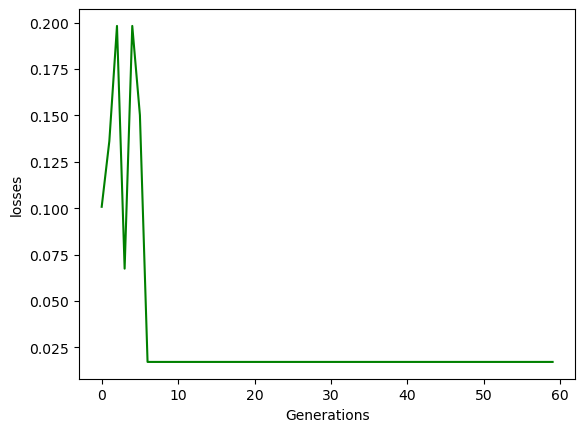

In [22]:
plt.plot(losses, c='green')
plt.xlabel('Generations')
plt.ylabel('losses')
plt.show()